In [1]:
## Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import prettypandas
%matplotlib inline

In [3]:
## Load the Data
loans = pd.read_csv("loan.csv", keep_default_na=False, low_memory=False)

In [4]:
## Make all columns viewable
pd.set_option('display.max_columns', 500)

## Part 1: Data Exploration and Evaluation

In [7]:
loans.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,,,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-2015,171.62,,Jan-2016,0.0,,1.0,INDIVIDUAL,,,,0.0,,,,,,,,,,,,,,,,,


In [8]:
loans.shape

(887379, 74)

In [9]:
## Get basic statistics for numeric columns
loans.describe(include=[np.number])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.0
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,18.157039,1.692079e+04,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,1.0
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,17.190626,2.242679e+04,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.0
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,11.910000,6.443000e+03,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,1.0
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,17.650000,1.187500e+04,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,1.0
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,23.950000,2.082900e+04,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,1.0
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9999.000000,2.904836e+06,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,1.0


In [10]:
## Get basic statistics for non-numeric columns
loans.describe(exclude=[np.number])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379
unique,2,7,35,299273,12,6,49385,3,103,10,2,887379,124471,14,63146,935,51,30,698,29,156,124,78,33,1357,136,2,99,101,104,13,169,2,309,450,4,9,10326,327343,14,36,13,18,202,17031,1273,19,29,10708,1129,21252,19,34,30
top,36 months,B,B3,,10+ years,MORTGAGE,60000.0,Source Verified,Oct-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,0.0,Aug-2001,0.0,,,9.0,0.0,0.0,22.0,f,Jan-2016,Feb-2016,Jan-2016,0.0,,INDIVIDUAL,,,,0.0,0.0,,,,,,,,,,,,,,,,
freq,621125,254535,56323,51457,291569,443557,34281,329558,48631,601779,887369,1,761350,524215,414001,9770,129517,716961,6659,497905,454312,750326,80285,751572,3540,32259,456848,470150,553406,730574,875553,665676,886868,886868,886870,886868,883236,700946,70276,866007,866007,866007,866007,866569,866007,868762,866007,866007,866007,866007,70276,866007,866007,866007


In [11]:
## Convert certain numeric variables to numeric dtypes
loans['annual_inc'] = pd.to_numeric(loans['annual_inc'])
loans['annual_inc_joint'] = pd.to_numeric(loans['annual_inc_joint'])
loans['open_acc'] = pd.to_numeric(loans['open_acc'])
loans['pub_rec'] = pd.to_numeric(loans['pub_rec'])

In [12]:
## Get basic statistics for numeric columns
loans.describe(include=[np.number])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,annual_inc_joint
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.0,511.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,11.548469,0.195307,1.692079e+04,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,1.0,109981.011585
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,5.317313,0.582091,2.242679e+04,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.0,52730.379847
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,8.000000,0.000000,6.443000e+03,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,1.0,76032.500000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,11.000000,0.000000,1.187500e+04,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,1.0,101771.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,14.000000,0.000000,2.082900e+04,13659.055000,13654.050000,10616.814231,10565.690000,8000.000000,2238.265000,0.000000,0.000000,0.000000,831.245000,1.0,132800.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,90.000000,86.000000,2.904836e+06,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,1.0,500000.000000


In [13]:
## Get basic statistics for non-numeric columns
loans.describe(exclude=[np.number])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,revol_util,total_acc,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379,887379
unique,2,7,35,299273,12,6,3,103,10,2,887379,124471,14,63146,935,51,30,698,29,156,124,1357,136,2,99,101,104,13,169,2,450,4,9,10326,327343,14,36,13,18,202,17031,1273,19,29,10708,1129,21252,19,34,30
top,36 months,B,B3,,10+ years,MORTGAGE,Source Verified,Oct-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,0.0,Aug-2001,0.0,,,0.0,22.0,f,Jan-2016,Feb-2016,Jan-2016,0.0,,INDIVIDUAL,,,0.0,0.0,,,,,,,,,,,,,,,,
freq,621125,254535,56323,51457,291569,443557,329558,48631,601779,887369,1,761350,524215,414001,9770,129517,716961,6659,497905,454312,750326,3540,32259,456848,470150,553406,730574,875553,665676,886868,886870,886868,883236,700946,70276,866007,866007,866007,866007,866569,866007,868762,866007,866007,866007,866007,70276,866007,866007,866007


In [14]:
#Check if individual loans appear more than once ('True' indicates they do not)
loans['id'].nunique() == len(loans)

True

In [15]:
#Check if individual members appear more than once ('True' indicates they do not)
loans['member_id'].nunique() == len(loans)

True

In [16]:
## Look at the frequency of different loan statuses
loans['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [17]:
## Look at frequency of different grades
loans['grade'].value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [18]:
## Create Binary Variable for Bad Loan
good_status = ['Current', 'Fully Paid', 'Issued', 'Does not meet the credit policy. Status:Fully Paid']
loans['bad_loan (0/1)'] = loans['loan_status'].apply(lambda x: 0 if x in good_status else 1)

*Note - this assumes that loans are either good or bad; the categories in the "good_status" list above constitute good loans.*

----------------------------------------------------------------------------------------------------------------------

In [19]:
def clean_dates(date_col):
    col = pd.to_datetime(date_col)
    col = col.dt.to_period('M')
    col.fillna('', inplace=True)
    return col

In [20]:
## Convert Relevant Dates to DateTime formats
loans['issue_date_clean'] = clean_dates(loans['issue_d'])
loans['last_pymnt_date_clean'] = clean_dates(loans['last_pymnt_d'])
loans['next_pymnt_date_clean'] = clean_dates(loans['next_pymnt_d'])

In [21]:
## Create column for year of origin
loans['year_of_origin'] = loans['issue_date_clean'].apply(lambda x: x.year)

In [22]:
## Create column for loan amount in thousands
loans['loan_amount_thous'] = loans['loan_amnt'].apply(lambda x: round(x,-3))

In [31]:
## Create column for loan amount ranges and brackets
loans['loan_amnt_range']  = pd.qcut(loans['loan_amnt'], 10)
loans['loan_amnt_bracket'] = loans['loan_amnt_range'].apply(lambda x: str(int(x.left / 1000)) + "-" +
                                                      str(int(x.right / 1000)) + "k")

In [24]:
## Create integer column for interest rate
loans['int_rate_round'] = loans['int_rate'].apply(lambda x: int(x))

In [25]:
## Create columns for income ranges and brackets
loans['income_range']  = pd.qcut(loans['annual_inc'], 10)
loans['income_bracket'] = loans['income_range'].apply(lambda x: str(int(x.left / 1000)) + "-" +
                                                      str(int(x.right / 1000)) + "k")

In [26]:
## Create a column representing the interval between payments
loans['payment_interval'] = loans.apply(lambda x: x['next_pymnt_date_clean'] - x['last_pymnt_date_clean']
                                        if x['next_pymnt_date_clean'] != '' and x['last_pymnt_date_clean'] != ''
                                        else '',
                                        axis=1)

### Plots

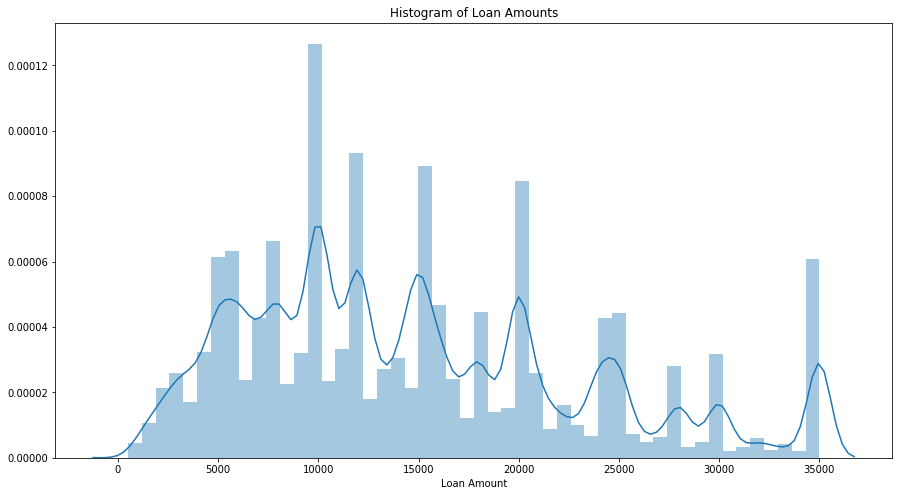

In [27]:
## Explore Distribution of Loan Sizes
plt.figure(figsize=(15,8))
loan_distribution = sns.distplot(loans['loan_amnt'])
loan_distribution.set_title("Histogram of Loan Amounts")
loan_distribution.set_xlabel("Loan Amount")
plt.show()

*Note - there are some noticeable peaks here. It appears as if loans that are multiples of 1000 are most common.*

In [28]:
##Confirm suspicion about multiples of 1000
loans['loan_amnt'].value_counts().head()

10000.0    61837
12000.0    50183
15000.0    47210
20000.0    46932
35000.0    36368
Name: loan_amnt, dtype: int64

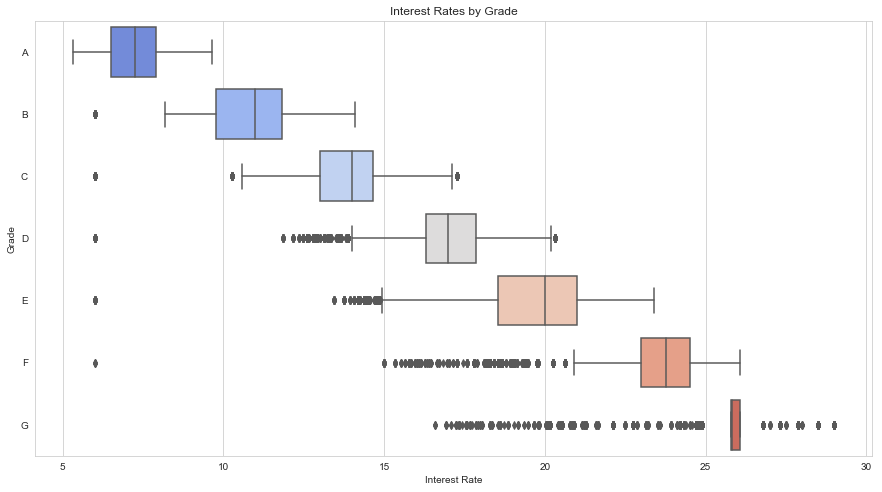

In [29]:
## Create boxplot to explore the relationship between interest rate and grade
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
boxplot = sns.boxplot(x='int_rate', y='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], data=loans,
                      palette='coolwarm')
boxplot.set_title("Interest Rates by Grade")
boxplot.set_xlabel("Interest Rate")
boxplot.set_ylabel("Grade")
plt.show()

*Loan grade is a consistent predictor of interest rate, though that holds less true for lower grade loans than higher ones.*

----------------------------------------------------------------------------------------------------------------------

In [32]:
## Sort Categories for Plotting
status_by_int_rate = loans.groupby('int_rate_round').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
int_rate_order = status_by_int_rate.index

status_by_grade = loans.groupby('grade').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
grade_order = status_by_grade.index

status_by_loan_amnt = loans.groupby('loan_amnt_bracket').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
loan_amnt_order = status_by_loan_amnt.index

status_by_year = loans.groupby('year_of_origin').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
year_order = status_by_year.index

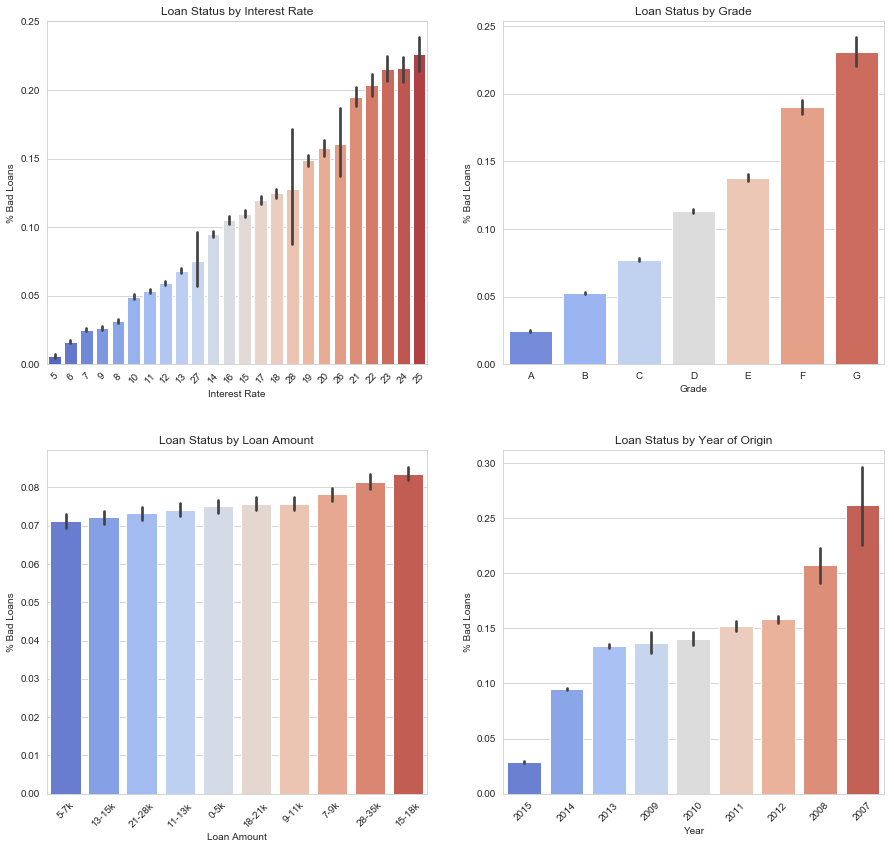

In [34]:
## Create Barplots of Loan Status 
fig = plt.figure(figsize=(15, 30))
palette = 'coolwarm'
ylabel = 'Rate of Bad Loans'

ax1 = plt.subplot(4,2,1)
sns.barplot('int_rate_round', 'bad_loan (0/1)', data=loans, order=int_rate_order, palette=palette, ax=ax1)
ax1.set_title("Loan Status by Interest Rate")
ax1.set_xlabel("Interest Rate")
ax1.set_ylabel(ylabel)
plt.xticks(rotation=45)

ax2 = plt.subplot(4,2,2)
sns.barplot('grade', 'bad_loan (0/1)', data=loans, order=grade_order, palette=palette, ax=ax2)
ax2.set_title("Loan Status by Grade")
ax2.set_xlabel("Grade")
ax2.set_ylabel(ylabel)

ax3 = plt.subplot(4,2,3)
sns.barplot('loan_amnt_bracket', 'bad_loan (0/1)', data=loans, order=loan_amnt_order, palette=palette, ax=ax3)
ax3.set_title("Loan Status by Loan Amount")
ax3.set_xlabel("Loan Amount")
ax3.set_ylabel(ylabel)
plt.xticks(rotation=45)

ax4 = plt.subplot(4,2,4)
sns.barplot('year_of_origin', 'bad_loan (0/1)', data=loans, order=year_order, palette=palette, ax=ax4)
ax4.set_title("Loan Status by Year of Origin")
ax4.set_xlabel("Year")
ax4.set_ylabel(ylabel)
plt.xticks(rotation=45)

fig.subplots_adjust(hspace=.25) ## Add vertical space between charts
plt.show()

*Some interesting patterns start to emerge here. As expected, there's a strong positive correlation between interest rates and bad loans. There's also an inverse relationship between loan grade and the frequency of bad loans. Of note, there doesn't appear to be a strong relationship between loan amount and loan status. Finally, we can see that loans originating at the beginning of the financial crisis in 07/08 fared significantly worse than those originating in recent years. Loans originating in 2015 are likely too new have gone bad as frequently as other in the data set.* 

----------------------------------------------------------------------------------------------------------------------

In [35]:
## Order Categories
status_by_income = loans.groupby('income_bracket').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
income_order = status_by_income.index

status_by_purpose = loans.groupby('purpose').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
purpose_order = status_by_purpose.index

status_homeowner = loans.groupby('home_ownership').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')
homeowner_order = status_homeowner.index

app_type_order=['JOINT', 'INDIVIDUAL']

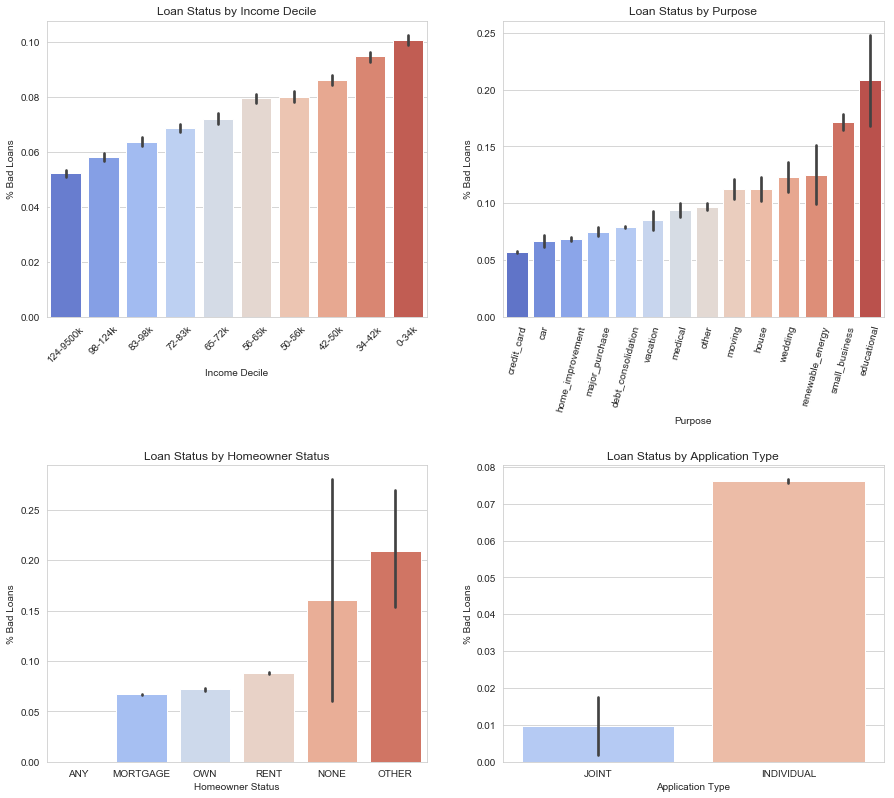

In [36]:
## Create Barplots of Loan Status 
fig = plt.figure(figsize=(15, 30))
palette = 'coolwarm'
ylabel = 'Rate of Bad Loans'

ax1 = plt.subplot(4,2,1)
sns.barplot('income_bracket', 'bad_loan (0/1)', data=loans, order=income_order, palette=palette, ax=ax1)
ax1.set_title("Loan Status by Income Decile")
ax1.set_xlabel("Income Decile")
ax1.set_ylabel(ylabel)
plt.xticks(rotation=45)

ax2 = plt.subplot(4,2,2)
sns.barplot('purpose', 'bad_loan (0/1)', data=loans, order=purpose_order, palette=palette, ax=ax2)
ax2.set_title("Loan Status by Purpose")
ax2.set_xlabel("Purpose")
ax2.set_ylabel(ylabel)
plt.xticks(rotation=75)

ax3 = plt.subplot(4,2,3)
sns.barplot('home_ownership', 'bad_loan (0/1)', data=loans, order=homeowner_order, palette=palette, ax=ax3)
ax3.set_title("Loan Status by Homeowner Status")
ax3.set_xlabel("Homeowner Status")
ax3.set_ylabel(ylabel)

ax4 = plt.subplot(4,2,4)
sns.barplot('application_type', 'bad_loan (0/1)', data=loans, order=app_type_order, palette=palette, ax=ax4)
ax4.set_title("Loan Status by Application Type")
ax4.set_xlabel("Application Type")
ax4.set_ylabel(ylabel)

fig.subplots_adjust(hspace=.5) ## Add vertical space between charts
plt.show()

*A couple of additional interesting patterns here. As expected, individuals with higher income are less likely to have bad loans than those with lower income. Loans taken out for education or for small businesses go bad at significantly higher rates than those for other purposes. Individual loans are more likely to go bad than joint ones.*

### Summary Statistics

In [149]:
bad_loans_by_grade = loans.groupby('grade').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')

In [150]:
bad_loans_by_grade.reset_index(inplace=True)

In [151]:
bad_loans_by_grade.rename(columns={'grade': 'Grade', 'bad_loan (0/1)': 'Rate of Bad Loans'},inplace=True)

In [152]:
bad_loans_by_grade['Rate of Bad Loans'] = bad_loans_by_grade['Rate of Bad Loans'].apply(lambda x: round(x,3))

In [153]:
bad_loans_by_grade

,Grade,Rate of Bad Loans
0,A,0.025
1,B,0.053
2,C,0.077
3,D,0.114
4,E,0.138
5,F,0.190
6,G,0.231


*Further evidence for the rate of bad loans by grade.*

In [154]:
bad_loans_by_year = loans.groupby('year_of_origin').agg({'bad_loan (0/1)': np.mean}).sort_values(by='bad_loan (0/1)')

In [155]:
bad_loans_by_year.reset_index(inplace=True)

In [156]:
bad_loans_by_year.rename(columns={'year_of_origin': 'Year of Origin', 'bad_loan (0/1)': 'Rate of Bad Loans'},
                         inplace=True)

In [157]:
bad_loans_by_year['Rate of Bad Loans'] = bad_loans_by_year['Rate of Bad Loans'].apply(lambda x: round(x,3))

In [158]:
bad_loans_by_year

,Year of Origin,Rate of Bad Loans
0,2015,0.029
1,2014,0.095
2,2013,0.134
3,2009,0.137
4,2010,0.140
5,2011,0.152
6,2012,0.158
7,2008,0.207
8,2007,0.262


*Further evidence for the rate of bad loans by year of origin.*

### Create New Features

In [37]:
## Create New Features - Used for Modeling Later
loans['2007/2008 origin'] = loans['year_of_origin'].apply(lambda x: 1 if x == 2007 or x == 2008 else 0)
loans['2015 origin'] = loans['year_of_origin'].apply(lambda x: 1 if x == 2015 else 0)
loans['renter'] = loans['home_ownership'].apply(lambda x: 1 if x == 'RENT' else 0)
loans['verified'] = loans['verification_status'].apply(lambda x: 1 if x == 'Verified' else 0)
loans['payment_plan'] = loans['pymnt_plan'].apply(lambda x: 1 if x == 'y' else 0)
loans['credit_card'] = loans['purpose'].apply(lambda x: 1 if x == 'credit_card' else 0)
loans['educ_or_small_bus'] = loans['purpose'].apply(lambda x: 1 if x == 'educational' or x == 'small_business' else 0)
loans['indiv_application'] = loans['application_type'].apply(lambda x: 1 if x == 'INDIVIDUAL' else 0)
for grade in list(loans['grade'].unique()):
    loans['grade' + grade] = loans['grade'].apply(lambda x: 1 if x == grade else 0)

## Part 2: Business Analysis

In [38]:
loans['term'].value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [39]:
## Create New DataFrame containing only 36 month term loans
loans_36m = loans[loans['term'] == ' 36 months']

In [40]:
loans_36m.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bad_loan (0/1),issue_date_clean,last_pymnt_date_clean,next_pymnt_date_clean,year_of_origin,loan_amount_thous,loan_range,loan_bracket,int_rate_round,income_range,income_bracket,payment_interval,loan_amnt_range,loan_amnt_bracket,2007/2008 origin,2015 origin,renter,verified,payment_plan,credit_card,educ_or_small_bus,indiv_application,gradeB,gradeC,gradeA,gradeE,gradeF,gradeD,gradeG
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,,,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-2015,171.62,,Jan-2016,0.0,,1.0,INDIVIDUAL,NaN,,,0.0,,,,,,,,,,,,,,,,,,0,2011-12,2015-01,,2011,5000.0,"(499.999, 5000.0]",0-5k,10,"(-0.001, 34000.0]",0-34k,,"(499.999, 5000.0]",0-5k,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0


* To identify the loans with at least 36 months of history available, calculate the number of months between the loan issue date and the most recent issue date in the dataset. This assumes that a) all loan histories have been kept up-to-date and b) loan histories are updated on a monthly basis.*

In [41]:
## Find the date of the most recent data
most_recent_date = loans_36m['issue_date_clean'].max()
most_recent_date

Period('2015-12', 'M')

In [42]:
## Calculate the number of months since issue for all loans
loans_36m['months_since_issue'] = loans_36m.apply(lambda x: most_recent_date - x['issue_date_clean'], axis=1)

In [43]:
## Calculate the number of loans with less than/at least 36 months of history
less_than_36m = loans_36m[loans_36m['months_since_issue'] < 36]
loans_final = loans_36m[loans_36m['months_since_issue'] >= 36]
print("Number of loans with less than 36 months of history:", len(less_than_36m))
print("Number of loans with at least 36 months of history:", len(loans_final))

Number of loans with less than 36 months of history: 546121
Number of loans with at least 36 months of history: 75004


In [44]:
loans_final['loan_status'].value_counts()

Fully Paid                                             63357
Charged Off                                             9071
Does not meet the credit policy. Status:Fully Paid      1789
Does not meet the credit policy. Status:Charged Off      649
Late (31-120 days)                                        81
Current                                                   33
Default                                                   12
Late (16-30 days)                                          6
In Grace Period                                            6
Name: loan_status, dtype: int64

In [45]:
def annual_ror_formula(final, initial, years):
    overall_ror = (final - initial) / initial
    ror = round((1 + overall_ror)**(1/3) - 1,3)
    return ror

In [46]:
## Calculate overall rate of return for each loan
loans_final['overall_return_rate'] = loans_final.apply(lambda x: round((x['total_pymnt'] - x['loan_amnt']) / 
                                                                      x['loan_amnt'],2),
                                                       axis=1)

In [47]:
## Calculate annual rate of return for each loan
loans_final['annual_return_rate'] = loans_final.apply(lambda x: annual_ror_formula(x['total_pymnt'],
                                                                                   x['loan_amnt'],
                                                                                   3), axis=1)

In [48]:
## Calculate the average rate of return
final = sum(loans_final['total_pymnt'])
initial = sum(loans_final['loan_amnt'])

avg_ror = round((final - initial) / initial, 3)
print("Average overall rate of return:", avg_ror)

Average overall rate of return: 0.089


In [49]:
## Calculate the average annual rate of return
avg_annual_ror = annual_ror_formula(final, initial, 3)
print("Average yearly rate of return:", avg_annual_ror)

Average yearly rate of return: 0.029


In [50]:
## Group by year of origin and grade
cohorts = loans_final.groupby(['year_of_origin', 'grade']).agg({'total_pymnt': sum, 'loan_amnt': sum})

In [51]:
cohorts.head(10)

total_pymnt  loan_amnt
year_of_origin grade                         
2007           A      4.277339e+05   391200.0
               B      8.157322e+05   817100.0
               C      1.162619e+06  1166875.0
               D      7.465583e+05   792550.0
               E      7.633371e+05   813825.0
               F      4.851173e+05   616250.0
               G      3.208786e+05   379675.0
2008           A      2.046931e+06  1982575.0
               B      5.189572e+06  5449775.0
               C      4.904757e+06  5127250.0

In [52]:
cohorts['annual_ror'] = cohorts.apply(lambda x: annual_ror_formula(x['total_pymnt'], x['loan_amnt'], 3),
                                     axis=1)

In [53]:
cohorts.head(10)

total_pymnt  loan_amnt  annual_ror
year_of_origin grade                                     
2007           A      4.277339e+05   391200.0       0.030
               B      8.157322e+05   817100.0      -0.001
               C      1.162619e+06  1166875.0      -0.001
               D      7.465583e+05   792550.0      -0.020
               E      7.633371e+05   813825.0      -0.021
               F      4.851173e+05   616250.0      -0.077
               G      3.208786e+05   379675.0      -0.055
2008           A      2.046931e+06  1982575.0       0.011
               B      5.189572e+06  5449775.0      -0.016
               C      4.904757e+06  5127250.0      -0.015

In [54]:
top_cohorts = cohorts.sort_values(by='annual_ror', ascending=False)

In [55]:
top_cohorts.head()

total_pymnt   loan_amnt  annual_ror
year_of_origin grade                                      
2012           G      7.321757e+05    596075.0       0.071
               F      2.391776e+06   2052775.0       0.052
2011           E      4.207110e+06   3619450.0       0.051
2012           E      1.850593e+07  16033425.0       0.049
               D      7.954094e+07  70465400.0       0.041

*The 2012 grade-G loans had the highest annual rate of return of any cohort.*

## Part 3: Modeling

In [56]:
loans_final.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bad_loan (0/1),issue_date_clean,last_pymnt_date_clean,next_pymnt_date_clean,year_of_origin,loan_amount_thous,loan_range,loan_bracket,int_rate_round,income_range,income_bracket,payment_interval,loan_amnt_range,loan_amnt_bracket,2007/2008 origin,2015 origin,renter,verified,payment_plan,credit_card,educ_or_small_bus,indiv_application,gradeB,gradeC,gradeA,gradeE,gradeF,gradeD,gradeG,months_since_issue,overall_return_rate,annual_return_rate
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,,,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-2015,171.62,,Jan-2016,0.0,,1.0,INDIVIDUAL,NaN,,,0.0,,,,,,,,,,,,,,,,,,0,2011-12,2015-01,,2011,5000.0,"(499.999, 5000.0]",0-5k,10,"(-0.001, 34000.0]",0-34k,,"(499.999, 5000.0]",0-5k,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,48,0.17,0.054


In [57]:
features = ['2007/2008 origin', '2015 origin', 'loan_amnt', 'int_rate_round', 'open_acc', 'pub_rec', 'gradeA',
            'gradeB', 'gradeC', 'gradeD', 'gradeE', 'gradeF', 'gradeG','renter', 'verified', 'payment_plan',
            'credit_card', 'educ_or_small_bus', 'indiv_application','annual_inc', 'annual_inc_joint']

In [64]:
X = loans_final[features]
y = loans_final[['annual_return_rate']]

In [65]:
## Test for nan values
for col in X.columns:
    if X[col].isnull().values.any():
        print(col)

open_acc
pub_rec
annual_inc
annual_inc_joint


In [67]:
## Impute values of 0 for rows with nan values
X = X.fillna(0)

*Note - filling nan values with 0 could bias the results (e.g. if the individuals in question did in fact have a lot of open accounts*

----------------------------------------------------------------------------------------------------------------------

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

In [69]:
X.head()

,2007/2008 origin,2015 origin,loan_amnt,int_rate_round,open_acc,pub_rec,gradeA,gradeB,gradeC,gradeD,gradeE,gradeF,gradeG,renter,verified,payment_plan,credit_card,educ_or_small_bus,indiv_application,annual_inc,annual_inc_joint
0,0,0,5000.0,10,3.0,0.0,0,1,0,0,0,0,0,1,1,0,1,0,1,24000.0,0.0
2,0,0,2400.0,15,2.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,1,12252.0,0.0
3,0,0,10000.0,13,10.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1,49200.0,0.0
5,0,0,5000.0,7,9.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,36000.0,0.0
7,0,0,3000.0,18,4.0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,1,48000.0,0.0


In [70]:
## Logistic Regression Classifier
lr = LR()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
## Decision Tree Classifier
clf = tree.DecisionTreeRegressor(max_depth=15, min_samples_split = 10)
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [72]:
## Random Forest Classifier
rf = ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
## Generate predictions for the full set of data
preds_lr = lr.predict(X)
preds_clf = clf.predict(X)
preds_rf = rf.predict(X)

In [74]:
## Add Prediction columns
loans_final['predictions_lr'] = preds_lr
loans_final['predictions_clf'] = preds_clf
loans_final['predictions_rf'] = preds_rf

One way to evaluate the performance is to compare the average annual return of the top x number of loans (sorted by the predictions) relative to that of a random sample. 

----------------------------------------------------------------------------------------------------------------------

In [75]:
def annual_ror(df, sample_size, total_col, loan_col, sample=False):
    if sample:
        rows = df.sample(sample_size)
    else:
        rows = df.head(sample_size)
    final = sum(rows[total_col])
    initial = sum(rows[loan_col])
    ror = annual_ror_formula(final, initial, 3)
    return ror

In [167]:
## Compare annual RORs for several sample sizes
best = loans_final.sort_values(by='annual_return_rate', ascending=False)
rors = {'sample size': [], 'best': [], 'lr': [], 'clf': [], 'rf': [], 'random': [], 'average': []}
for sample_size in range(10,10001,100):
    for pred_col in ['predictions_lr', 'predictions_clf', 'predictions_rf']:
        df = loans_final.sort_values(by=pred_col, ascending=False)
        ror = annual_ror(df, sample_size, 'total_pymnt', 'loan_amnt')
        rors[pred_col.split('_')[1]].append(ror)
    rors['sample size'].append(sample_size)
    rors['best'].append(annual_ror(best, sample_size, 'total_pymnt', 'loan_amnt'))
    rors['random'].append(annual_ror(loans_final, sample_size, 'total_pymnt', 'loan_amnt', sample=True))
    rors['average'].append(avg_annual_ror)
    
ror_comparisons = pd.DataFrame(rors, columns=['sample size', 'best', 'lr', 'clf', 'rf', 'random', 'average'])

In [168]:
ror_comparisons.head()

,sample size,best,lr,clf,rf,random,average
0,10,0.133,0.061,0.098,0.124,0.036,0.029
1,110,0.117,0.038,0.095,0.106,0.039,0.029
2,210,0.113,0.042,0.085,0.098,0.030,0.029
3,310,0.111,0.047,0.078,0.097,0.026,0.029
4,410,0.109,0.048,0.074,0.096,0.025,0.029


In [169]:
## Look at mean performance for each model across all sample sizes
ror_comparisons.mean()

sample size    4960.00000
best              0.09446
lr                0.04663
clf               0.06206
rf                0.07892
random            0.02906
average           0.02900
dtype: float64

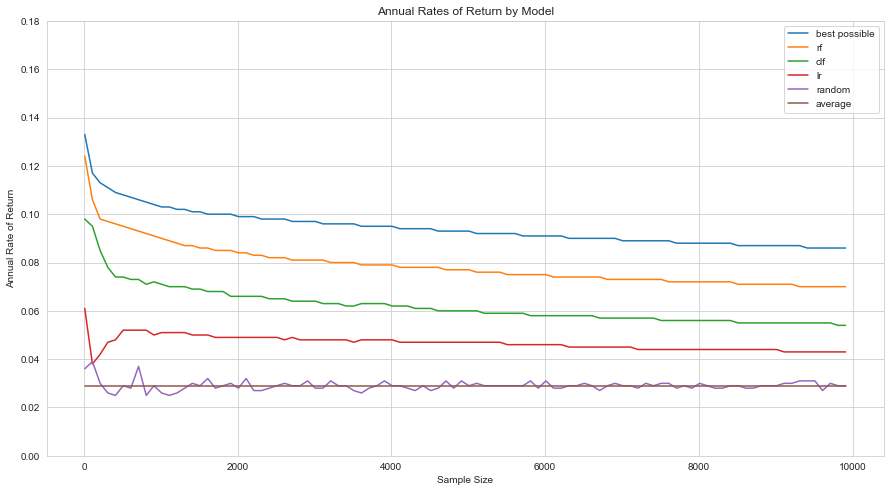

In [170]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='sample size', y='best', data=ror_comparisons, label='best possible')
sns.lineplot(x='sample size', y='rf', data=ror_comparisons, label='rf')
sns.lineplot(x='sample size', y='clf', data=ror_comparisons, label='clf')
sns.lineplot(x='sample size', y='lr', data=ror_comparisons, label='lr')
sns.lineplot(x='sample size', y='random', data=ror_comparisons, label='random')
sns.lineplot(x='sample size', y='average', data=ror_comparisons, label='average')
ax.set_title("Annual Rates of Return by Model")
ax.set_xlabel("Sample Size")
ax.set_ylabel("Annual Rate of Return")
ax.set_yticks(np.arange(0, 0.2, 0.02))
plt.show()

*The random forest model performed best, followed closely by the decision tree model and finally by the linear regression model. All fared better than the random sample of loans.*

In [83]:
def plot_feature_importance(model, model_name, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    xticks = []
    importancesBars = []
    for f in range(len(features)):
        xticks.append(features[indices[f]]) 
        importancesBars.append(importances[indices[f]])
    location = range(len(xticks))
    xticks = np.array(xticks)
    importancesBars = np.array(importancesBars)
    
    plt.figure(figsize=(15, 8))
    
    ax = plt.subplot(1, 1, 1)
    ax.set_title("Feature Importance - " + model_name)

    rects = ax.bar(location, importancesBars, 0.35, color='r')
    ax.set_xlabel("Feature Name")
    ax.set_ylabel("Importance")
    ax.set_yticks(np.arange(0, 0.4, 0.05))
    plt.xticks(location, xticks, horizontalalignment = 'center')
    plt.xticks(rotation=45)
    plt.show()

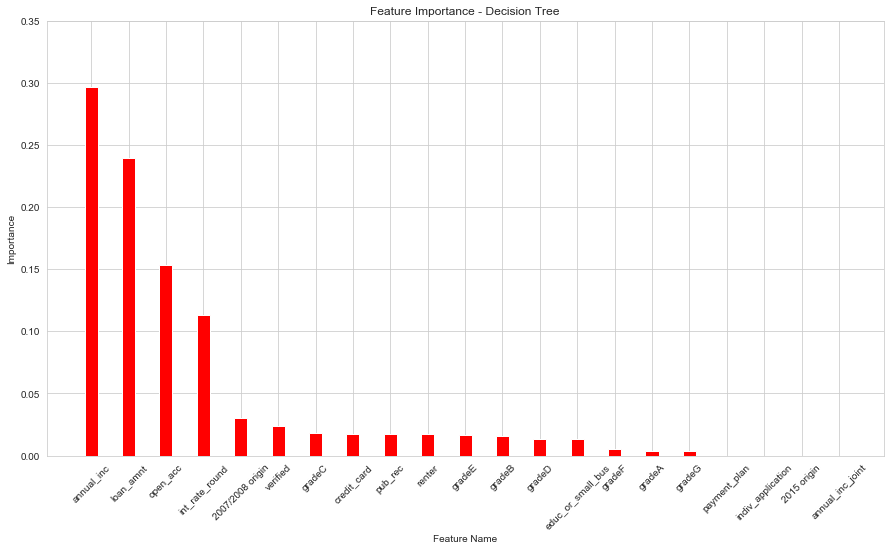

In [84]:
plot_feature_importance(clf, "Decision Tree", features)

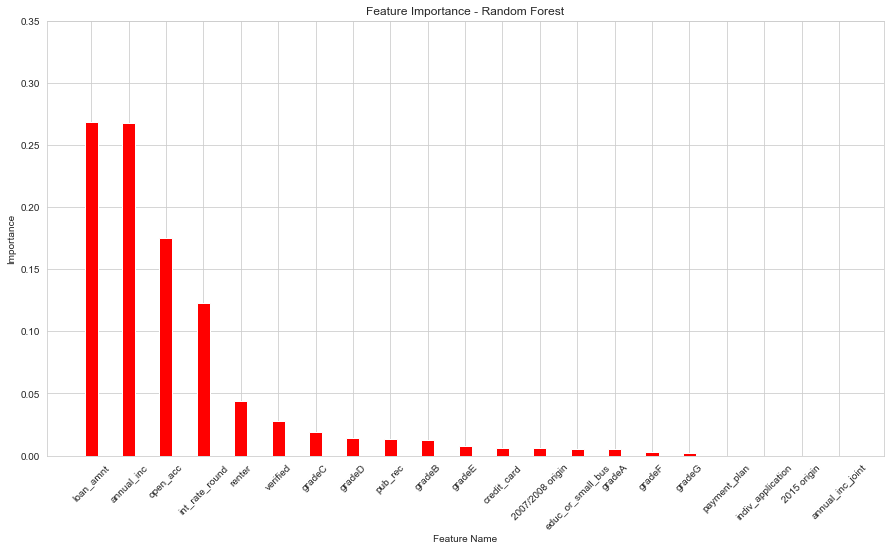

In [85]:
plot_feature_importance(rf, "Random Forest", features)